Демо генератора изображений

In [4]:
cd ..

/home/bfilippov/kaggle/whiteboard


In [354]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pytest
from models import image_generator
import ast
import os
import numpy as np
import pandas as pd
from skimage import img_as_float
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import random
import cv2


train = pd.read_csv('source/train.csv')
train['labels'] = train['labels'].map(ast.literal_eval)
index = np.random.randint(0,len(train))
image_path = os.path.join('source', train.iloc[index].path)
all_labels = train.iloc[index]['labels']
for label in all_labels:
    if label['class'] == 'whiteboard':
        break
xn = [int(float(x)) for x in label['xn'].split(';')][:4]
yn = [int(float(y)) for y in label['yn'].split(';')][:4]
labels = np.zeros((4,2))
for i in range(4):
    labels[i, 0] = xn[i]
    labels[i, 1] = yn[i]
img = cv2.imread(image_path)
kw = dict(rotation_range=15,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.3,
        channel_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        dim_ordering='tf')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-100.0, 600.0, 500.0, -100.0)

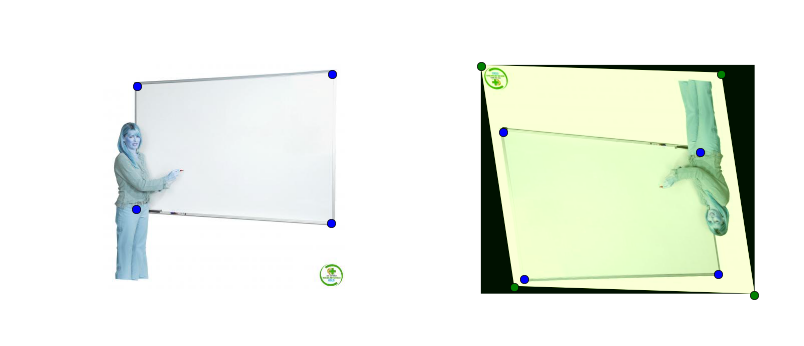

In [358]:
margins = dict(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)

rimg, rlabels,tc = image_generator.random_transform(img, labels, **kw)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))
fig.subplots_adjust(**margins)
ax1.imshow(img)
ax1.plot(labels[:, 0], labels[:, 1], 'o')
ax1.axis('off')
ax2.imshow(rimg)
ax2.plot(rlabels[:, 0], rlabels[:, 1], 'o')
ax2.plot(tc[:, 0], tc[:, 1], 'o')
ax2.axis('off')